# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Import Required Packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

**Data Exploration**

In [3]:
pd.set_option('display.float_format',  '{:,.2f}'.format)
data_path = '/content/drive/MyDrive/NYC_TAXI_TRIP_TIME_PRED/NYC_Taxi_Data.csv'
nyc_df = pd.read_csv(data_path)

In [4]:
# Shape of dataset // nyc_df.shape
print(f'The total number of rows are {nyc_df.shape[0]}.')
print(f'The total number of columns are {nyc_df.shape[1]}.')

The total number of rows are 1458644.
The total number of columns are 11.


In [5]:
# Informatio about dataset. 
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In this NYC dataset, There are 1458644 entries and 11 columns. 
Out of total 11 columns- 'id', 'pickup datetime', 'drop off datetime' and 'store and fwd flag' are non numerical columns.

In [6]:
# Column names
print(nyc_df.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [7]:
# First 5 rows of dataset
nyc_df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435


In [8]:
# Last 5 rows of dataset
nyc_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98,40.75,-73.99,40.74,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00,40.75,-73.97,40.80,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.96,40.77,-74.00,40.71,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98,40.75,-73.97,40.76,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.98,40.78,-73.97,40.79,N,198


In [9]:
# Checking null values in nyc_df
print(f'Null count of values by column wise.')
nyc_df.isnull().sum()

Null count of values by column wise.


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no null values in any column.

In [10]:
# Checking duplicated ids in id column
duplicated_count = nyc_df.duplicated(subset = 'id').sum()
print(f'Total duplicated entries in id column {duplicated_count}.')

Total duplicated entries in id column 0.


**Descriptive Analysis**

In [11]:
# Description of numerical columns
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,"1,458,644.00","1,458,644.00","1,458,644.00","1,458,644.00","1,458,644.00","1,458,644.00","1,458,644.00"
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,"5,237.43"
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,"1,075.00"
max,2.00,9.00,-61.34,51.88,-61.34,43.92,"3,526,282.00"


In this dataset the passenger count column has maximum 9 passenger. Minimum 1 which is most common thing to see. Trip duration is also 1 second which is not possible for a successful trip and 3526282 seconds which very high.

In [12]:
# Count of unique entries in each column.
nyc_df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

**Data Processing and Feature Creation**

In [13]:
# Changing datetime data type to datetime for feature creation
nyc_df['pickup_datetime']=pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime']=pd.to_datetime(nyc_df['dropoff_datetime'])

In [14]:
# Few new feartures created and added in dataframe
nyc_df['pickup_day']=nyc_df['pickup_datetime'].dt.day_name()
nyc_df['dropoff_day']=nyc_df['dropoff_datetime'].dt.day_name()
nyc_df['pickup_month']=nyc_df['pickup_datetime'].dt.month
nyc_df['dropoff_month']=nyc_df['dropoff_datetime'].dt.month
nyc_df['pickup_hr']=nyc_df['pickup_datetime'].dt.hour
nyc_df['dropoff_hour']=nyc_df['dropoff_datetime'].dt.hour

In [15]:
# Gives great circle between on sphere when coordinates available
!pip install haversine
from haversine import haversine

In [16]:
# Created a function to calculate a haversine distance
def calculate_distance(pickup_lat, pickup_long, droppff_lat, dropoff_long):
  start_coordinates=(pickup_lat, pickup_long)
  stop_coordinates=(droppff_lat, dropoff_long)
  return haversine(start_coordinates, stop_coordinates)

In [17]:
# Distance in km feature added in dataframe.
nyc_df['distance'] =nyc_df.apply(lambda x: calculate_distance(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis = 1)

In [18]:
# Added speed colum to undestand the speed of trips.(km/hr)
nyc_df['speed'] = (nyc_df['distance']/(nyc_df['trip_duration']/3600))

In [19]:
# Converting seconds in hr
nyc_df['trip_duration_hour']=nyc_df['trip_duration']/3600 

In [20]:
# Lets see newly added columns in dataframe
nyc_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_hr', 'dropoff_hour', 'distance', 'speed',
       'trip_duration_hour'],
      dtype='object')

***Visualization and Analysis***

In [21]:
nyc_df['vendor_id'].value_counts().to_frame()

,vendor_id
2,780302
1,678342


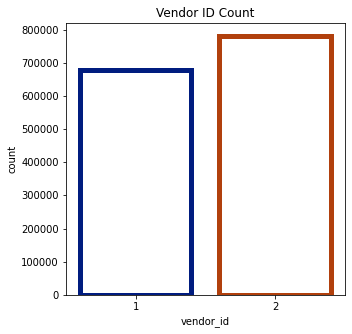

In [22]:
plt.figure(figsize= (5,5))
sns.countplot(x = nyc_df['vendor_id'],facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 2))
plt.title('Vendor ID Count')
plt.show()

In this dataset, 2 unique vendors. Vendor_Id 2 has 780303 records and vendor_id 1 has 678342.

In [23]:
# Passenger Count 
nyc_df['passenger_count'].value_counts().to_frame()

,passenger_count
1,1033540
2,210318
5,78088
3,59896
6,48333
4,28404
0,60
7,3
9,1
8,1


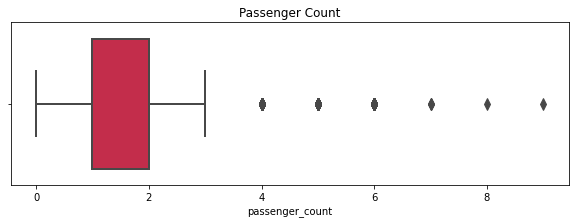

In [24]:
# Passenger Count
plt.figure(figsize= (10,3))
sns.boxplot(x = nyc_df['passenger_count'], color = 'crimson', linewidth=2, fliersize=8)
plt.title('Passenger Count')
plt.show()

In [25]:
# Removing 0,7,8 and 9 passenger count entries.
nyc_df = nyc_df[nyc_df['passenger_count']!=0]
nyc_df = nyc_df[nyc_df['passenger_count']<=6]

In [26]:
# Checking again passener count 
nyc_df['passenger_count'].value_counts().to_frame()

,passenger_count
1,1033540
2,210318
5,78088
3,59896
6,48333
4,28404


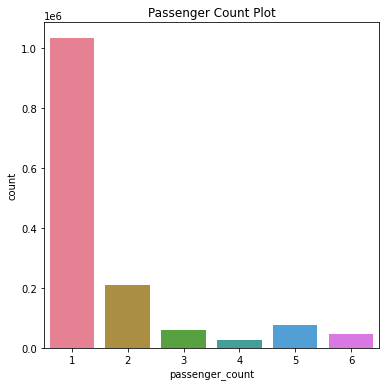

In [27]:
# Countolot of passenger count
plt.figure(figsize=(6,6))
sns.countplot(x=nyc_df.passenger_count, palette = 'husl')
plt.title('Passenger Count Plot')
plt.show()

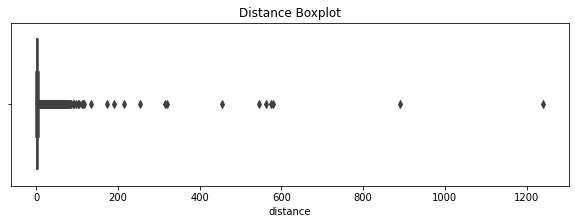

In [28]:
# Distance Viz in Km
plt.figure(figsize= (10,3))
sns.boxplot(x = nyc_df['distance'])
plt.title('Distance Boxplot')
plt.show()

In [29]:
print(nyc_df.distance.describe())

count   1,458,579.00
mean            3.44
std             4.30
min             0.00
25%             1.23
50%             2.09
75%             3.88
max         1,240.91
Name: distance, dtype: float64


The avg distance of trips is 3.44 km. There are trips with 0 km distance as well. Maximum distance travelled is 1240 km as per given data. 

In [30]:
# Check number of trips with 0 Km distance
distance_zero = len(nyc_df[nyc_df['distance']== 0])
print(f'The ntotal number of trips with 0 Km distance are {distance_zero}.')

The ntotal number of trips with 0 Km distance are 5887.


Lets explore the distance feature which is 0 km.

In [31]:
# Created a df for zero distance
zero_distance_df = nyc_df[nyc_df['distance']==0]

In [32]:
# Descriptive Analysis of Zero distance trip duration.
zero_distance_df['trip_duration'].describe()

count    5,887.00
mean       536.29
std      1,953.65
min          1.00
25%         38.00
50%        352.00
75%        725.50
max     86,352.00
Name: trip_duration, dtype: float64

Zero distance trips duration analysis tell us that there are some inconsistencies with data. Minimum trip duration is 1 second and maximum is 86352 seconds. 

In this 0 distance df we found there is a trip duration given so instead dropping, 0 distance filled with median distance

In [33]:
distance_abv_100 = len(nyc_df[nyc_df['distance'] >= 100])
print(f'The total number of trips with mmore than 100 Km distance are \n {distance_abv_100}')

The total number of trips with mmore than 100 Km distance are 
 19


In [34]:
# Dropped rows with distance above 100km as it has very few entries
nyc_df = nyc_df[nyc_df['distance']<=100]

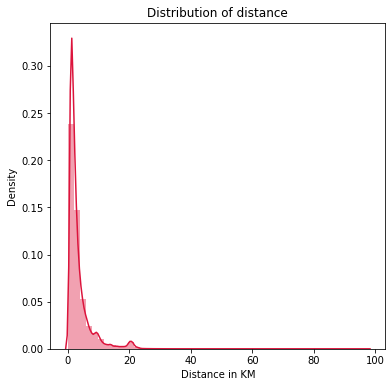

In [35]:
# Distribution of distance
plt.figure(figsize=(6,6))
sns.distplot(x= nyc_df['distance'], color = 'crimson')
plt.title('Distribution of distance')
plt.xlabel('Distance in KM')
plt.show()

In [36]:
print(nyc_df['distance'].median())
print(nyc_df['distance'].mean())

2.09375866774669
3.4362095098472176


This distance distribution plot is right skewed. **Mean is a greater than median** .

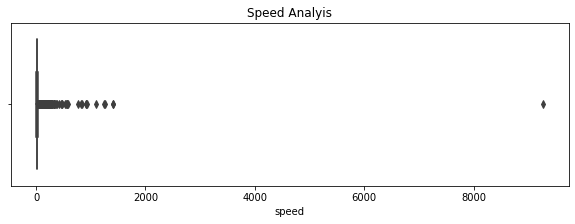

In [37]:
# Speed Analysis
plt.figure(figsize= (10,3))
sns.boxplot(x = nyc_df['speed'])
plt.title('Speed Analyis')
plt.show()

In [38]:
# Lets see the average speed of a trip in Km/hr
print(nyc_df['speed'].mean())

14.401408566780928


In [39]:
number_trips_above_avg_speed = len(nyc_df[nyc_df['speed'] > nyc_df['speed'].mean()])
print(f'The total number of trips with more than avg speed are \n {number_trips_above_avg_speed }.')

The total number of trips with more than avg speed are 
 589755.


In [40]:
temp_df = nyc_df[nyc_df['speed'] <=100]
number_trips_lessthan_100 = len(temp_df[temp_df['speed'] <= 100 ])
print(f'The total number of trips with less than or eqaul to 100km/hr speed are {number_trips_lessthan_100}.')

The total number of trips with less than or eqaul to 100km/hr speed are 1458400.


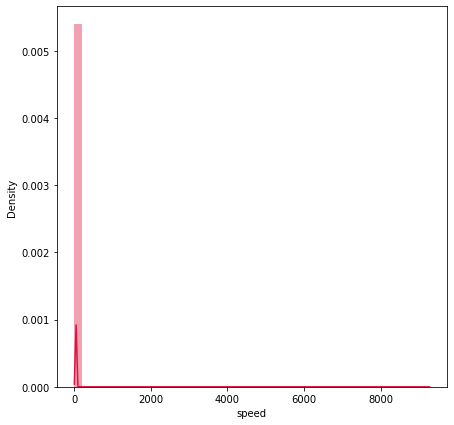

In [41]:
# Distribution of speed
plt.figure(figsize=(7,7))
sns.distplot(nyc_df['speed'],color="crimson")
plt.show()

**Trip Duration** is our target variable.

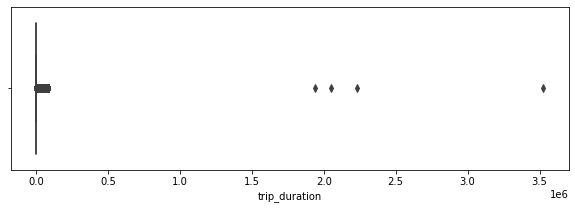

In [42]:
# Boxplot for a trip duration
plt.figure(figsize= (10,3))
sns.boxplot(x = nyc_df['trip_duration'])
plt.show()

In [43]:
# Dropped largest trip duration. Boxplot clearly tell us about outliers.
outlier_trip_pred = nyc_df.nlargest(4, 'trip_duration')
nyc_df = nyc_df.drop(outlier_trip_pred.index, axis=0)

In [44]:
# Checking number of trips with less than 60 seconds
trips_less_than_sixty_seconds = nyc_df[nyc_df['trip_duration']<60]

In [45]:
# Shape of trips less than 60 seconds
trips_less_than_sixty_seconds.shape

(8550, 20)

In [46]:
# Keeping only trips with trip duration more than 60 seconds
nyc_df = nyc_df[nyc_df['trip_duration']>60]

Dropped trips with less than 60 seconds duration as it suggests that it might be cancelled by Driver or User.

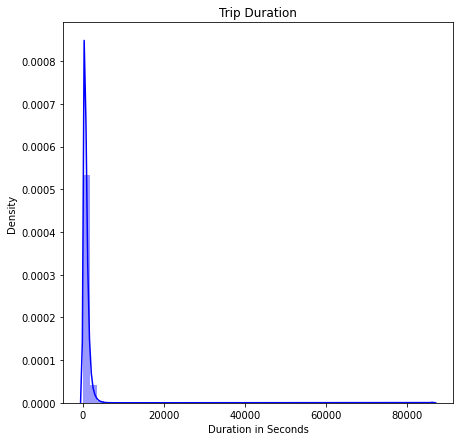

In [47]:
# Trip duration distribution
plt.figure(figsize=(7,7))
sns.distplot(x=nyc_df['trip_duration'],color="blue")
plt.xlabel('Duration in Seconds')
plt.title('Trip Duration')
plt.show()

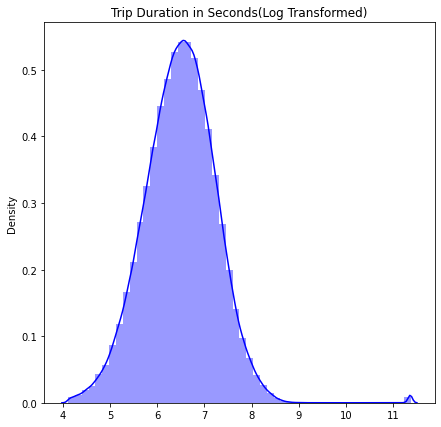

In [48]:
# Log transformed plot of a trip duration
plt.figure(figsize=(7,7))
sns.distplot(x=np.log(nyc_df['trip_duration']), color="blue")
plt.title('Trip Duration in Seconds(Log Transformed)')
plt.show()

In [49]:
# Number of rows and column after processing data
nyc_df.shape

(1449824, 20)

In [50]:
# Daywise pickup count
nyc_df['pickup_day'].value_counts()

Friday       222190
Saturday     219564
Thursday     217228
Wednesday    209001
Tuesday      201586
Sunday       194003
Monday       186252
Name: pickup_day, dtype: int64

Pickup day data tell us about the **most of trips taken** on **Friday** and **Monday** is a day where **least trips taken.**

In [51]:
# Daywise drop off data
nyc_df['dropoff_day'].value_counts()

Friday       221688
Saturday     219599
Thursday     216400
Wednesday    208655
Tuesday      201353
Sunday       195860
Monday       186269
Name: dropoff_day, dtype: int64

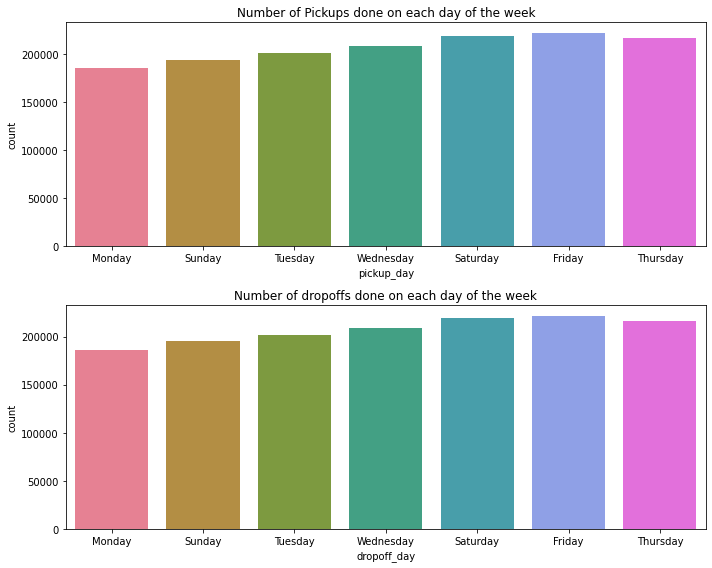

In [52]:
# Pickup day and Drop off day viz.
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,8))
sns.countplot(x='pickup_day',data=nyc_df, palette = 'husl', ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=nyc_df, palette = 'husl', ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

In [53]:
# Monthwise pickup data
nyc_df['pickup_month'].value_counts()

3    254682
4    250049
5    246955
2    236893
6    232878
1    228367
Name: pickup_month, dtype: int64

In [54]:
# Monthwise drop off data
nyc_df['dropoff_month'].value_counts()

3    254626
4    250040
5    247023
2    236887
6    232805
1    228316
7       127
Name: dropoff_month, dtype: int64

In [55]:
# Few trips has a drop off in 7th month
nyc_df[nyc_df['dropoff_month']== 7].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hr,dropoff_hour,distance,speed,trip_duration_hour
46600,id1230274,2,2016-06-30 08:00:53,2016-07-01 07:46:38,4,-73.92,40.77,-73.78,40.65,N,85545,Thursday,Friday,6,7,8,7,18.66,0.79,23.76
54314,id0462006,1,2016-06-30 23:42:19,2016-07-01 00:01:12,1,-73.99,40.76,-74.01,40.71,N,1133,Thursday,Friday,6,7,23,0,5.43,17.25,0.31
59891,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.99,40.75,-73.96,40.80,N,86387,Thursday,Friday,6,7,16,16,6.20,0.26,24.00
77419,id2787535,2,2016-06-30 23:51:36,2016-07-01 00:01:20,1,-73.97,40.79,-74.00,40.76,N,584,Thursday,Friday,6,7,23,0,3.51,21.63,0.16
115092,id2785585,2,2016-06-30 23:47:29,2016-07-01 00:08:00,1,-74.01,40.75,-73.96,40.76,N,1231,Thursday,Friday,6,7,23,0,3.90,11.42,0.34


Drop off month 7 tell us that **126 trips** started in 6th month and ended in 7th month.

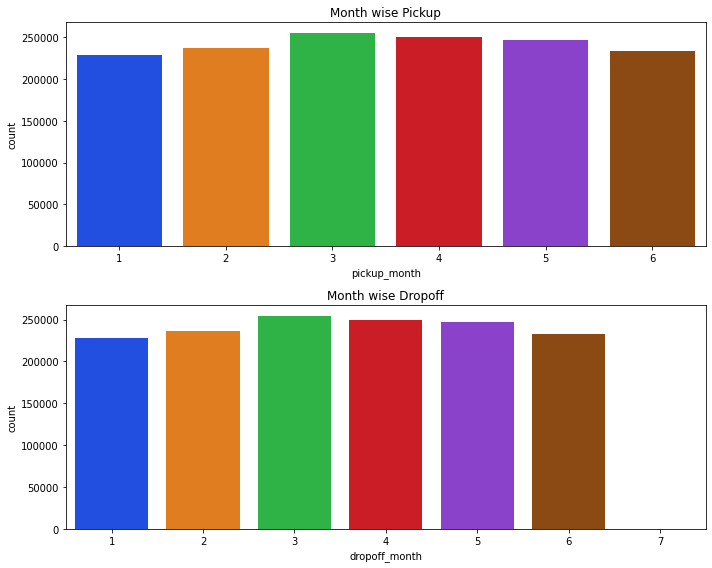

In [56]:
# Monthwise pickup and drop off count viz
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,8))
sns.countplot(x='pickup_month',data=nyc_df, palette = 'bright', ax=ax[0])
ax[0].set_title('Month wise Pickup')
sns.countplot(x='dropoff_month',data=nyc_df, palette = 'bright', ax=ax[1])
ax[1].set_title('Month wise Dropoff')
plt.tight_layout()

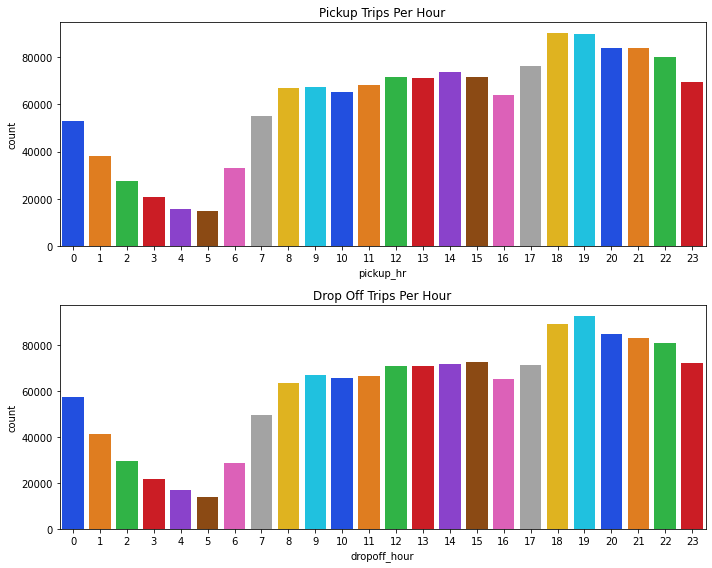

In [57]:
# Hourwise data of Pickup and Drop off
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,8))
sns.countplot(x='pickup_hr',data=nyc_df, palette = 'bright', ax=ax[0])
ax[0].set_title('Pickup Trips Per Hour')
sns.countplot(x='dropoff_hour',data=nyc_df, palette = 'bright', ax=ax[1])
ax[1].set_title('Drop Off Trips Per Hour')
plt.tight_layout()

**Distance Vs Trip_duration**

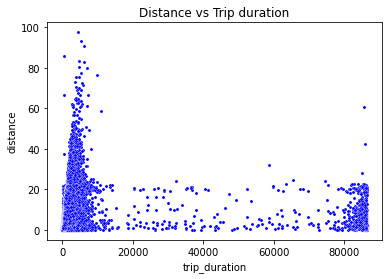

In [58]:
sns.scatterplot(x='trip_duration',y='distance',color='Blue', s=10, data = nyc_df)
plt.title('Distance vs Trip duration')
plt.show()

Distance vs Trip duration tell us that there are some inconsistencies with data. Time taken is higher comparatively distance covered.

In [59]:
# Lets see distance covered less than 1km and time taken more than hr or 3600 seconds.
temp2 = nyc_df.loc[(nyc_df['distance'] <= 1 ) & (nyc_df['trip_duration'] >= 3600), :]
temp2.shape

(461, 20)

There are 461 records. Distance travelled in less than or equal to 1 km and trip duration more than 3600 seconds.

In [60]:
# Filtering inconsistent data
nyc_df = nyc_df[~((nyc_df.distance <=1 ) & (nyc_df.trip_duration >= 3600))]

In [61]:
# Trip_duration greater than 10000 seconds analysis
duration_temp = nyc_df[nyc_df['trip_duration']>=10000]

In [62]:
# Trip duration more than 10000seconds and its distance analysis.
duration_temp.distance.describe()

count   1,802.00
mean        4.97
std         5.46
min         1.00
25%         1.75
50%         2.95
75%         5.64
max        60.60
Name: distance, dtype: float64

Distance attribute from duration_temp tell us that there are 1798 total trips. The average distance covered is 4.95Km and time taken is more than 10000 seconds which translates 166 minutes to 80000+ seconds which is 23+ hrs.

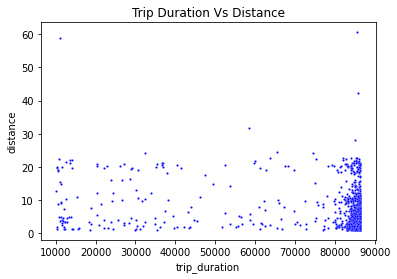

In [63]:
# Trip Duration greater than 10000seconds and distance viz.
sns.scatterplot(y = duration_temp.distance, x = duration_temp.trip_duration, s = 5, color='Blue')
plt.title('Trip Duration Vs Distance')
plt.show()

In [64]:
# Keeping records with trip_duration upto 10000seconds.
nyc_df = nyc_df[nyc_df.trip_duration<=10000]

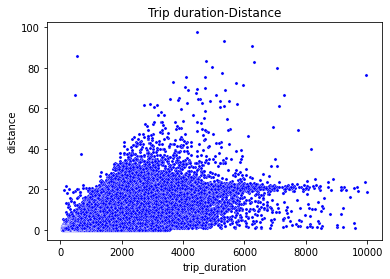

In [65]:
sns.scatterplot(x='trip_duration',y='distance',color='Blue', s=10, data = nyc_df)
plt.title('Trip duration-Distance')
plt.show()

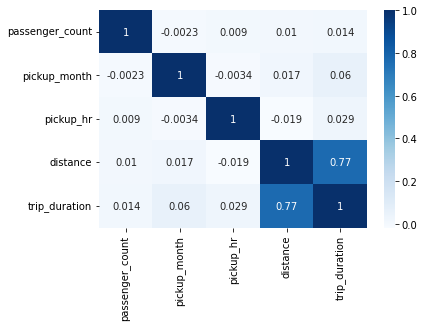

In [66]:
# Correlation matrix
sns.heatmap(nyc_df[['passenger_count', 'pickup_month', 'pickup_hr', 'distance', 'trip_duration']].corr(), cmap='Blues', annot=True)
plt.show()

**Model Preparation and Building Models**

In [67]:
# Copy of wrangled dataset
nycdf = nyc_df.copy()

In [68]:
# Column names 
nycdf.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_hr', 'dropoff_hour', 'distance', 'speed',
       'trip_duration_hour'],
      dtype='object')

In [69]:
# Dropping some features to create x varaibles.
nyc_x = nycdf.drop(['id', 'vendor_id', 'pickup_longitude', 'pickup_datetime','dropoff_datetime', 'store_and_fwd_flag', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'speed', 'trip_duration_hour'], axis = 1)

In [70]:
# Independent features.
nyc_x.head(2)

,passenger_count,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hr,dropoff_hour,distance
0,1,Monday,Monday,3,3,17,17,1.50
1,1,Sunday,Sunday,6,6,0,0,1.81


In [71]:
# Independent Variables. Converted categorical into numbers using one hot coding. 
nyc_X = pd.get_dummies(nyc_x, columns=["pickup_day", 'dropoff_day'], prefix=["day", 'drop_day' ], drop_first=True)

In [72]:
# Independent features.
nyc_X.head()

,passenger_count,pickup_month,dropoff_month,pickup_hr,dropoff_hour,distance,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,drop_day_Monday,drop_day_Saturday,drop_day_Sunday,drop_day_Thursday,drop_day_Tuesday,drop_day_Wednesday
0,1,3,3,17,17,1.50,1,0,0,0,0,0,1,0,0,0,0,0
1,1,6,6,0,0,1.81,0,0,1,0,0,0,0,0,1,0,0,0
2,1,1,1,11,12,6.39,0,0,0,0,1,0,0,0,0,0,1,0
3,1,4,4,19,19,1.49,0,0,0,0,0,1,0,0,0,0,0,1
4,1,3,3,13,13,1.19,0,1,0,0,0,0,0,1,0,0,0,0


For this prediction using following Regressors.
* Linear Regression 
* Decision Tree
* Decision Tree with Hyperparameter Tuning
* Random Forest- Bagging
* XG Boost - Boosting 

In [73]:
# Selecting X variables and y varible for model training
X = nyc_X
y = nycdf['trip_duration']

In [74]:
# Split data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [75]:
# Scaling X features so that all values lies in same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [76]:
# Check the shape of train dataset
print(X_train.shape,y_train.shape)
# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(1158048, 18) (1158048,)
(289513, 18) (289513,)


In [77]:
# Evaluation metrics 
def evaluation_metrics(actual, predict,model=''):

  print(f"{model} R2    :", r2_score(actual,predict))
  print(f"{model} MSE   :", mean_squared_error(actual,predict))
  print(f"{model} RMSE  :", np.sqrt(mean_squared_error(actual,predict)))

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [79]:
# Import and fit Linear Regression 
LR = LinearRegression()
# Fit X and y 
LR.fit(X_train, y_train)

LinearRegression()

In [80]:
# Dependent var prediction on train and test
y_pred_train = LR.predict(X_train)
y_pred = LR.predict(X_test)

In [81]:
# Evaluation Metrics
evaluation_metrics((y_train),(y_pred_train),'LR_train')
evaluation_metrics((y_test),(y_pred),'LR_Test')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

LR_train R2    : 0.6054229738786137
LR_train MSE   : 169569.92256174498
LR_train RMSE  : 411.7886867821225
LR_Test R2    : 0.6062435425221119
LR_Test MSE   : 168846.67121456488
LR_Test RMSE  : 410.9095657374806
Adjusted R2 :  0.6062190597479107


For both train and test data got 0.60 R2 score. It shows Linear Regression not able to capture correct underlaying patterns. Ideally 1 or closer to 1 R2 score  means regression able to capture 100% of the variance from Target variable.

**Decision Tree**

In [82]:
# DT with default parameters
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='r2') #Newly added. The function cross_val_score takes an average over cross-validation folds.
print(scores.mean()) #Newly added
dt.fit(X_train, y_train)
# Predictions
y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)

0.4898242531642801


In [83]:
print('The training r2 score is', r2_score(y_train, y_pred_train))
print('The testing r2 score is', r2_score(y_test, y_pred))
print('_'*50)
print('Train and test score tell us model is overfitting')

The training r2 score is 0.9994517030287458
The testing r2 score is 0.49567176401877466
__________________________________________________
Train and test score tell us model is overfitting


In [84]:
# Decision tree evaluation without hypertuning
evaluation_metrics((y_train),(y_pred_train),'DTR_train')
evaluation_metrics((y_test),(y_pred),'DTR_Test')
print("Adjusted R2 Train: ",1-(1-r2_score((y_train), (y_pred_train)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

DTR_train R2    : 0.9994517030287458
DTR_train MSE   : 235.63124257473828
DTR_train RMSE  : 15.350284771779913
DTR_Test R2    : 0.49567176401877466
DTR_Test MSE   : 216260.9456372544
DTR_Test RMSE  : 465.0386496166253
Adjusted R2 Train:  0.9994516689370357
Adjusted R2 Test :  0.49564040617285166


Decision Trees are flexible and captures all available information in Training test. It leads to model overfit and causes concern for unseen data. It wont give good accuracy on Unseen data. 

**Decision Tree Hyperparameter Tuning**

In [85]:
# Maximum depth of trees
max_depth = [3,6,9,12,15]
# Minimum number of samples required to split a node
min_samples_split = [4,7,10,13,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5,10,15,20]
# Hyperparameter Grid
param_dict = {'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [86]:
from sklearn.model_selection import GridSearchCV
DT = DecisionTreeRegressor()
# Grid search
DT_grid = GridSearchCV(estimator=DT, param_grid = param_dict, cv = 3, verbose=1, scoring='r2')
# Fitting model
DT_grid.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 6, 9, 12, 15],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [4, 7, 10, 13, 15]},
             scoring='r2', verbose=1)

In [87]:
print('The best estimator', DT_grid.best_estimator_) #Newly added
print('The R2 score using the parameters:', DT_grid.best_score_)

The best estimator DecisionTreeRegressor(max_depth=15, min_samples_leaf=20, min_samples_split=4)
The R2 score using the parameters: 0.7261612750895234


In [88]:
y_predict_train = DT_grid.predict(X_train)
y_predict_test = DT_grid.predict(X_test)

In [89]:
evaluation_metrics((y_train),(y_predict_train),'DTH_Train') #DTH- Decison Tree Hyperparametr
evaluation_metrics((y_test),(y_predict_test),'DTH_Test')
print("Adjusted R2 Train : ",1-(1-r2_score((y_train), (y_predict_train)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test : ",1-(1-r2_score((y_test), (y_predict_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

DTH_Train R2    : 0.746429062369868
DTH_Train MSE   : 108972.39679793929
DTH_Train RMSE  : 330.1096738932976
DTH_Test R2    : 0.7314084881987357
DTH_Test MSE   : 115174.70208517845
DTH_Test RMSE  : 339.37398557517406
Adjusted R2 Train :  0.7464132959744423
Adjusted R2 Test :  0.7313917878622438


**Decision Tree** with parameter tuning reduced the overfitting of model and generalised the performance and accuracy of model. **R2 score for training set is 0.74 and testing set is 0.73.** 

**Random Forest Regressor**

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
# Number of trees in the foreset
# n_estimators = [30]

# Max number of levels in each decision tree
max_depth = [8]

# Minimum number of data points placed in a node before the node is split
min_samples_split = [2,4]

# Minimum number of data points allowed in a leaf node
min_samples_leaf = [3,5]

# Hyperparameter Grid
param_dict = {'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [92]:
# Fitting Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=20, random_state=42)
rf_grid = GridSearchCV(estimator = rf_model, param_grid= param_dict, cv = 3, scoring='r2')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=20, random_state=42),
             param_grid={'max_depth': [8], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [2, 4]},
             scoring='r2')

In [93]:
# Tain and Test Predictions
y_rf_train = rf_grid.predict(X_train)
y_rf_test = rf_grid.predict(X_test)

In [94]:
# Best Estimators for Random Forest
rf_grid.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=3, n_estimators=20,
                      random_state=42)

In [95]:
# Evaluation Metrics MSE, RMSE, R2 and 
evaluation_metrics((y_train),(y_rf_train),'RandomForest_train')
evaluation_metrics((y_test),(y_rf_test),'RandomForest_Test')
print("Adjusted R2 Train : ",1-(1-r2_score((y_train), (y_rf_train)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test : ",1-(1-r2_score((y_test), (y_rf_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

RandomForest_train R2    : 0.7130405280040423
RandomForest_train MSE   : 123321.15714649916
RandomForest_train RMSE  : 351.1711223128963
RandomForest_Test R2    : 0.7121477901253097
RandomForest_Test MSE   : 123433.88029852723
RandomForest_Test RMSE  : 351.3315816981548
Adjusted R2 Train :  0.7130226855945418
Adjusted R2 Test :  0.7121298922076404


**XG Boost**

In [99]:
from xgboost import XGBRegressor

In [96]:
# Fitting XG Boost Model 
xg_reg = XGBRegressor(learning_rate = 0.1, max_depth = 8, n_estimators = 200)
xg_reg.fit(X_train,y_train)

[12:50:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=8, n_estimators=200)

In [97]:
# Train and Test Predictions
xgb_train1 = xg_reg.predict(X_train)
xgb_test2 = xg_reg.predict(X_test)

In [115]:
# Evalation Metrics
evaluation_metrics((y_train),(xgb_train1),'XGBoost_train')
evaluation_metrics((y_test),(xgb_test2),'XGBoost_Test')
print("Adjusted R2 Train : ",1-(1-r2_score((y_train), (xgb_train1)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test : ",1-(1-r2_score((y_test), (xgb_test2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

XGBoost_train R2    : 0.7715863988260219
XGBoost_train MSE   : 98161.00304634916
XGBoost_train RMSE  : 313.30656400137735
XGBoost_Test R2    : 0.7608616858697271
XGBoost_Test MSE   : 102544.87903357619
XGBoost_Test RMSE  : 320.22629347631056
Adjusted R2 Train :  0.771572196649738
Adjusted R2 Test :  0.7608468168580919


**XG Boost** a Decision Tree ensemble mehtod, increased the accuracy of predictions. For training set **R2 score is 0.77 and testing set 0.76.** It means XG Boost will perform good predictions on Unseen data as well.

**Let's see which features are important for Trip Duration Prediction**

In [102]:
# Feature Importance
features = nyc_X.columns
importances = xg_reg.feature_importances_
indices = np.argsort(importances)

In [113]:
importance_feature__df= pd.DataFrame({'Features': features, 'Feature_importance':importances})
print(importance_feature__df)

              Features  Feature_importance
0      passenger_count                0.00
1         pickup_month                0.01
2        dropoff_month                0.03
3            pickup_hr                0.08
4         dropoff_hour                0.10
5             distance                0.45
6           day_Monday                0.03
7         day_Saturday                0.07
8           day_Sunday                0.09
9         day_Thursday                0.02
10         day_Tuesday                0.01
11       day_Wednesday                0.01
12     drop_day_Monday                0.03
13   drop_day_Saturday                0.02
14     drop_day_Sunday                0.01
15   drop_day_Thursday                0.01
16    drop_day_Tuesday                0.01
17  drop_day_Wednesday                0.01


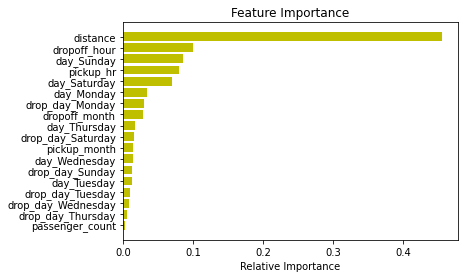

In [108]:
# Feature Importance Plot
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [114]:
from prettytable import PrettyTable

In [123]:
table = PrettyTable(['Model', 'MSE_Train', 'MSE_Test', 'RSME_Train', 'RSME_Test', 'R2_Score_Train', 'R2_Score_Test', 'Adusted_R2_Score_Train', 'Adusted_R2_Score_Test'])
# table.add_row(['Linear regression', ])
# table.add_row(['Decision Tree',])
# table.add_row(['Decision Tree with Hyperparameters Tuning', ])
table.add_row(['Random Forest', 123321.15, 123433.88, 351.17, 351.33, 0.7130,0.7121, 0.7130, 0.7121])
table.add_row(['XGBoost',  98161.00, 102544.87, 313.30, 351.33, 0.7715, 0.7608, 0.7715, 0.7608])

In [124]:
print(table)

+---------------+-----------+-----------+------------+-----------+----------------+---------------+------------------------+-----------------------+
|     Model     | MSE_Train |  MSE_Test | RSME_Train | RSME_Test | R2_Score_Train | R2_Score_Test | Adusted_R2_Score_Train | Adusted_R2_Score_Test |
+---------------+-----------+-----------+------------+-----------+----------------+---------------+------------------------+-----------------------+
| Random Forest | 123321.15 | 123433.88 |   351.17   |   351.33  |     0.713      |     0.7121    |         0.713          |         0.7121        |
|    XGBoost    |  98161.0  | 102544.87 |   313.3    |   351.33  |     0.7715     |     0.7608    |         0.7715         |         0.7608        |
+---------------+-----------+-----------+------------+-----------+----------------+---------------+------------------------+-----------------------+
